In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [226]:
data = pd.read_csv('cost_revenue_clean.csv')    
data

,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527
...,...,...
5029,225000000,1519479547
5030,215000000,1671640593
5031,306000000,2058662225
5032,200000000,2207615668


In [227]:
data_new = pd.read_csv('cost_revenue_dirty.csv')
data_new

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [228]:
columns_to_delete =['Movie_Title','Release_Date','Rank']
data_new.drop(columns_to_delete, axis=1, inplace=True)

In [229]:
data_new

,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,"$110,000","$11,000,000","$10,000,000"
1,"$385,907",$0,$0
2,"$200,000","$8,000,000","$8,000,000"
3,"$100,000","$3,000,000","$3,000,000"
4,"$245,000","$22,000,000","$11,000,000"
...,...,...,...
5386,"$15,000,000",$0,$0
5387,"$160,000,000",$0,$0
5388,"$175,000,000",$0,$0
5389,"$50,000,000",$0,$0


In [230]:
columns_to_delete =['USD_Domestic_Gross']
data_new.drop(columns_to_delete, axis=1, inplace=True)

In [231]:
data_new.rename(columns={'USD_Production_Budget': 'production_budget_usd'}, inplace=True)
data_new.rename(columns={'USD_Worldwide_Gross': 'worldwide_gross_usd'}, inplace=True)

In [232]:
data_new

,production_budget_usd,worldwide_gross_usd
0,"$110,000","$11,000,000"
1,"$385,907",$0
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"
...,...,...
5386,"$15,000,000",$0
5387,"$160,000,000",$0
5388,"$175,000,000",$0
5389,"$50,000,000",$0


In [233]:
data_new['production_budget_usd'] = data_new['production_budget_usd'].str.replace(',', '').str.replace('$', '')

In [234]:
data_new['worldwide_gross_usd'] = data_new['worldwide_gross_usd'].str.replace(',', '').str.replace('$', '')

In [235]:
data_new

,production_budget_usd,worldwide_gross_usd
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000
...,...,...
5386,15000000,0
5387,160000000,0
5388,175000000,0
5389,50000000,0


In [236]:
df = data_new.dropna(subset=['production_budget_usd'])
df = df.query('production_budget_usd != 0')

In [237]:
df = data_new.dropna(subset=['worldwide_gross_usd'])
df = df.query('worldwide_gross_usd != 0')

In [238]:
data_new

,production_budget_usd,worldwide_gross_usd
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000
...,...,...
5386,15000000,0
5387,160000000,0
5388,175000000,0
5389,50000000,0


In [239]:
data_new = data_new[data_new['worldwide_gross_usd'] != 0]

In [240]:
data_new

,production_budget_usd,worldwide_gross_usd
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000
...,...,...
5386,15000000,0
5387,160000000,0
5388,175000000,0
5389,50000000,0


In [241]:
data_new['worldwide_gross_usd'] = data_new['worldwide_gross_usd'].replace(0, np.nan)
data_new.dropna(subset=['worldwide_gross_usd'], inplace=True)

In [242]:
data_new['worldwide_gross_usd'] = data_new['worldwide_gross_usd'].str.replace('[^\d.]', '', regex=True)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Amer\AppData\Local\Temp\ipykernel_240\1177934973.py:1: SyntaxWarning: invalid escape sequence '\d'
  data_new['worldwide_gross_usd'] = data_new['worldwide_gross_usd'].str.replace('[^\d.]', '', regex=True)


In [243]:
data_new['worldwide_gross_usd'] = data_new['worldwide_gross_usd'].astype(float)

In [244]:
mean_value = data_new['worldwide_gross_usd'].mean()
data_new['worldwide_gross_usd'] = data_new['worldwide_gross_usd'].replace(0, mean_value)

In [245]:
data_new

,production_budget_usd,worldwide_gross_usd
0,110000,1.100000e+07
1,385907,8.885542e+07
2,200000,8.000000e+06
3,100000,3.000000e+06
4,245000,2.200000e+07
...,...,...
5386,15000000,8.885542e+07
5387,160000000,8.885542e+07
5388,175000000,8.885542e+07
5389,50000000,8.885542e+07


In [246]:
x = pd.DataFrame(data_new,columns=["production_budget_usd"])
y = pd.DataFrame(data_new,columns=["worldwide_gross_usd"])

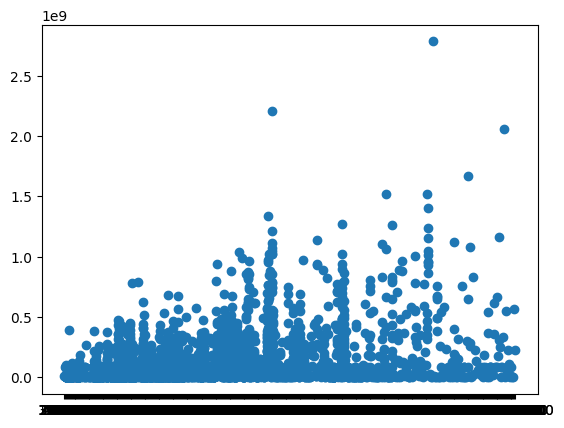

In [247]:
x = data_new['production_budget_usd'].values.flatten()
y = data_new['worldwide_gross_usd'].values.flatten()
plt.scatter(x, y)

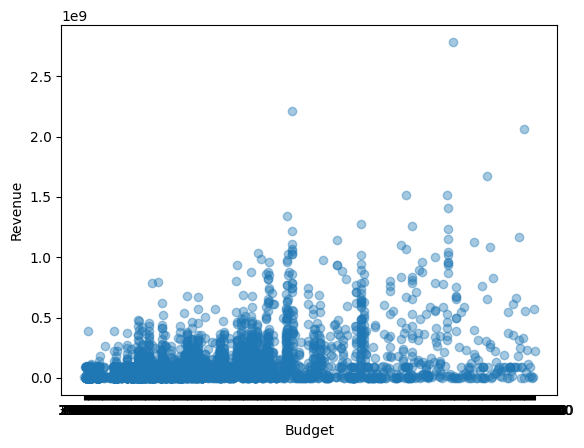

In [248]:
plt.scatter(x, y,alpha=0.4)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

In [249]:
import sklearn

In [250]:
from sklearn.linear_model import LinearRegression

In [251]:
reg = LinearRegression()

 use the reshape(-1, 1) method to convert the 1-dimensional array to a 2-dimensional array with a single column. 
 

In [254]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
reg.fit(x, y)

LinearRegression()

In [255]:
reg.coef_

array([[2.99882916]])

التقاطع

In [256]:
reg.intercept_

array([1434776.00800554])

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

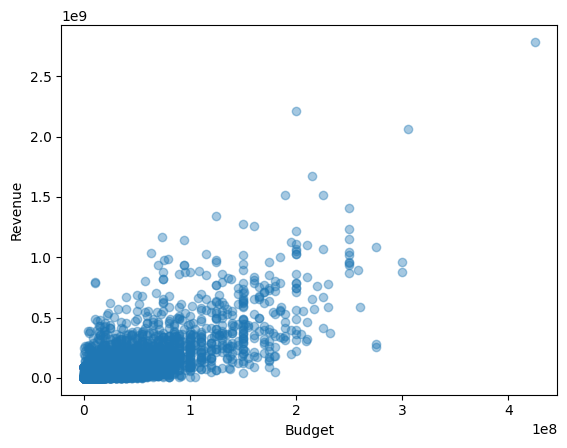

In [271]:
plt.scatter(x.tolist(), y.tolist(), alpha=0.4)
plt.xlabel("Budget")
plt.ylabel("Revenue")

plt.plot(x.tolist(), reg.predict(x.tolist()))

plt.show()


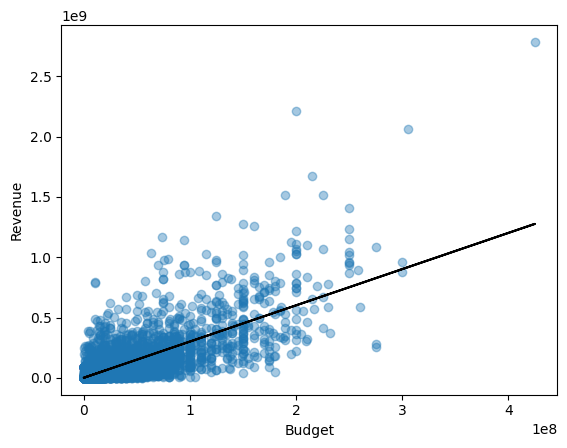

In [273]:
x_numeric = x.astype(float)  # Convert x to numeric values

plt.scatter(x_numeric.tolist(), y.tolist(), alpha=0.4)
plt.xlabel("Budget")
plt.ylabel("Revenue")

plt.plot(x_numeric.tolist(), reg.predict(x_numeric.tolist()),color='black')

plt.show()